In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Inputs

In [2]:
#Tamaño de la matriz
matrix_size=21

#Longitud de línea 1
lenght_line1= 10
#Longitud de línea 2
lenght_line2= 16

#Cantidad de puntos por línea
puntos=100

#Posición en Y de línea 1
qloc_y=5
#Posición en Y de línea 2
qloc_y2=-5

#Tamaño carga 1
q= 2e-5
#Tamaño carga 2
q2=-2e-5

#Tamaño de los puntos de la línea 1
s1=500
#Tamaño de los puntos de la línea 2
s2=300

#Tamaño de los ejes
gmin= -20
gmax= 20 

#Constante de Coulomb
k= 9e9

## Función

In [3]:
def getfield (X, Y, q, qloc, k):
    
    X_new= X-qloc[0] #Cambian los valores en base a las coordenadas
    Y_new= Y-qloc[1] #Cambian los valores en base a las coordenadas

    comp = X_new + (Y_new * 1j) 
    angle=np.angle(comp) #Cálculo del ángulo

    r2=(X_new**2)+(Y_new**2) #Consiguiendo el valor de r^2
    En=(k*q)/(r2) #Valor del Campo Eléctrico

    Ex=En*(np.cos(angle)) #Componente X del Campo eléctrico
    Ey=En*(np.sin(angle)) #Componente Y del Campo eléctrico
    
    return Ex, Ey #Devuelve las componentes del campo

In [4]:
#Definen la cantidad de puntos "Cargas" y sus coordenadas en el eje X 
qlocx_range= np.linspace(-(lenght_line1/2),(lenght_line1/2),puntos)
qlocx_range2= np.linspace(-(lenght_line2/2),(lenght_line2/2),puntos)

#Se encargan de asegurarse que las cargas negativas sean Negras y las positivas Rojas
if(q<0):
    c1="black"
if(q>=0):
    c1="red"
if(q2<0):
    c2="black"
if(q2>=0):
    c2="red"

In [5]:
Ex=np.zeros([matrix_size,matrix_size]) #Crea una matriz de Ceros en Ex para poder reemplazar los valores luego
Ey=np.zeros([matrix_size,matrix_size]) #Crea una matriz de Ceros en Ey para poder reemplazar los valores luego

Ex2=np.zeros([matrix_size,matrix_size]) #Crea una matriz de Ceros en Ex2 para poder reemplazar los valores luego
Ey2=np.zeros([matrix_size,matrix_size]) #Crea una matriz de Ceros en Ey2 para poder reemplazar los valores luego

x=np.linspace(gmin,gmax,matrix_size) #Define los puntos que serán usados para la matriz
y=np.linspace(gmin,gmax,matrix_size) #Define los puntos que serán usados para la matriz
X,Y= np.meshgrid(x,y) #Crea la matriz X Y

for i,qloc_x in enumerate (qlocx_range): #Ciclo que se repite una vez por carga en la línea 1
    
    #llama a la función "getfield" y los valores que regresa "Ex y Ey" son reemplazados por New_Ex y New_Ey
    New_Ex, New_Ey = getfield(X, Y, q, [qloc_x,qloc_y],k) 
    
    
    Ex+=New_Ex #Va sumando los valores de Ex
    Ey+=New_Ey #Va sumando los valores de Ey
    
for i, qloc_x2 in enumerate (qlocx_range2): #Ciclo que se repite una vez por carga en la línea 2
    
    #llama a la función "getfield" y los valores que regresa "Ex y Ey" son reemplazados por New_Ex2 y New_Ey2
    New_Ex2, New_Ey2 = getfield(X, Y, q2, [qloc_x2,qloc_y2],k)
    
    Ex2+=New_Ex2 #Va sumando los valores de Ex2
    Ey2+=New_Ey2 #Va sumando los valores de Ey2

#Se hacen las sumatorias de los componentes en X y en Y para tener la sumatoria total
Ext=Ex+Ex2
Eyt=Ey+Ey2

In [6]:
mag=np.sqrt((Ext**2)+(Eyt**2)) #Saca la magnitud de los vectores

Ex_u=Ext/mag #Saca el componente en X del vector unitario
Ey_u=Eyt/mag #Saca el componente en Y del vector unitario

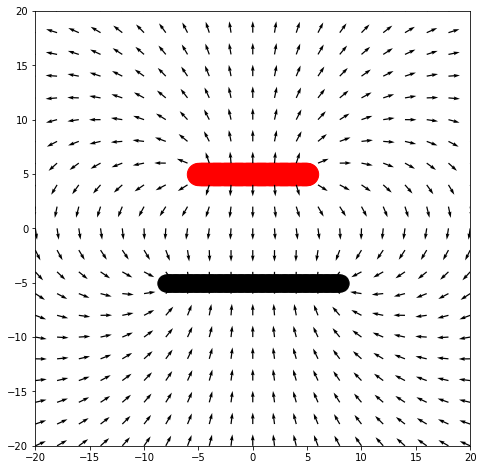

In [7]:
# Creamos una figura y eje con plt.subplots()
fig, ax = plt.subplots(figsize = (8,8))

#Usamos los ciclos para agregar la cantidad de puntos deseados
for i,qloc_x in enumerate (qlocx_range):
    
    ax.scatter(qloc_x,qloc_y,c=c1,s=s1)

for i, qloc_x2 in enumerate(qlocx_range2):
        ax.scatter(qloc_x2,qloc_y2,c=c2, s=s2)
    
# Agregamos al eje las flechas de los vectores con plt.quiver()
ax.quiver(X,Y,Ex_u,Ey_u,color="black")


#Configuramos las dimensiones del eje y el aspecto
ax.axis([gmin,gmax,gmin,gmax])
ax.set_aspect('equal','box')